In [1]:
# Import modules we'll need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [68]:
# Import data
houses_dirty_train = pd.read_csv('train.csv')

In [69]:
# Let's get an idea for the different values that we can expect to see for each column.
for house in houses_dirty_train:
    print(house, houses_dirty_train[house].unique()[0:5])

Id [1 2 3 4 5]
MSSubClass [ 60  20  70  50 190]
MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage [65. 80. 68. 60. 84.]
LotArea [ 8450  9600 11250  9550 14260]
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer']
OverallQual [7 6 8 5 9]
OverallCond [5 8 6 7 4]
YearBuilt [2003 1976 2001 1915 2000]
YearRemodAdd [2003 1976 2002 1970 2000]
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace']
Exterior2nd ['VinylSd' '

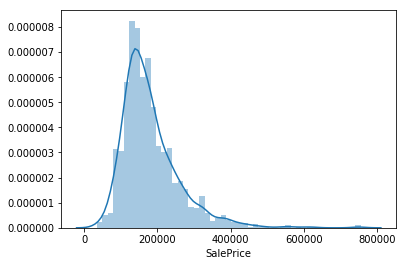

In [32]:
# Let's look more closely at the distribution of the sale price, what we want to predict
sns.distplot(houses_dirty_train['SalePrice']);

Text(0, 0.5, 'Sale Price ($)')

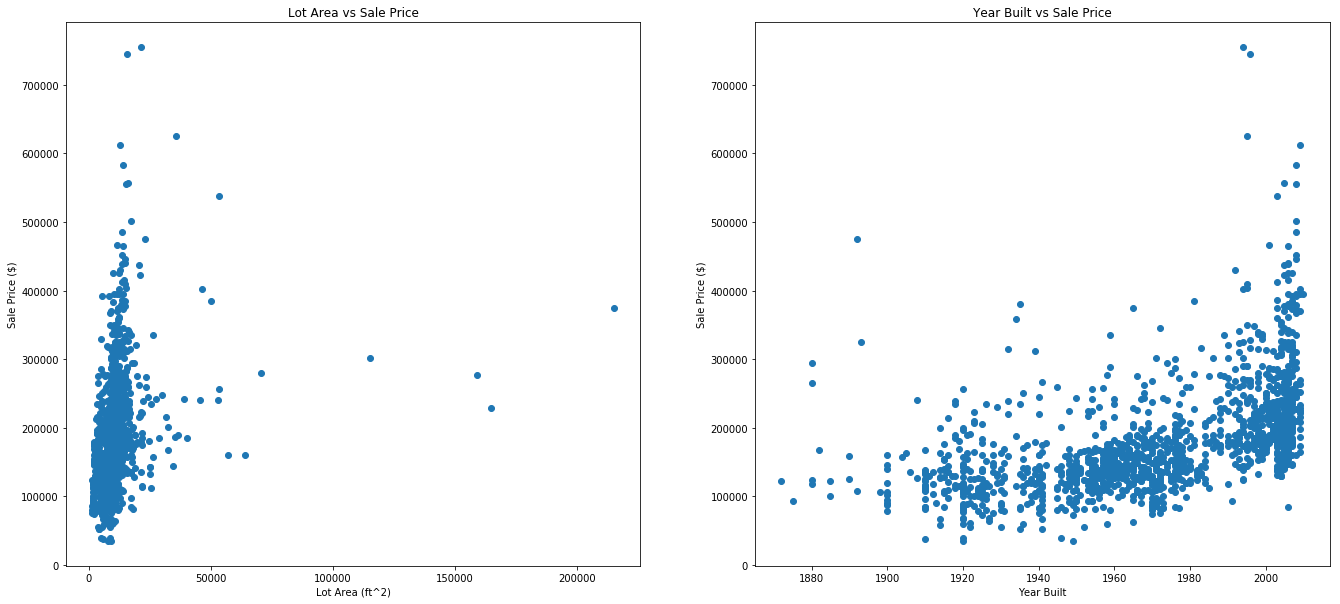

In [70]:
# How does sale price relate to some of our other features?
plt.figure(figsize=(35, 10))

plt.subplot(131)
plt.scatter(houses_dirty_train['LotArea'], houses_dirty_train['SalePrice'])
plt.title("Lot Area vs Sale Price")
plt.xlabel("Lot Area (ft^2)")
plt.ylabel("Sale Price ($)")

plt.subplot(132)
plt.scatter(houses_dirty_train['YearBuilt'], houses_dirty_train['SalePrice'])
plt.title("Year Built vs Sale Price")
plt.xlabel("Year Built")
plt.ylabel("Sale Price ($)")

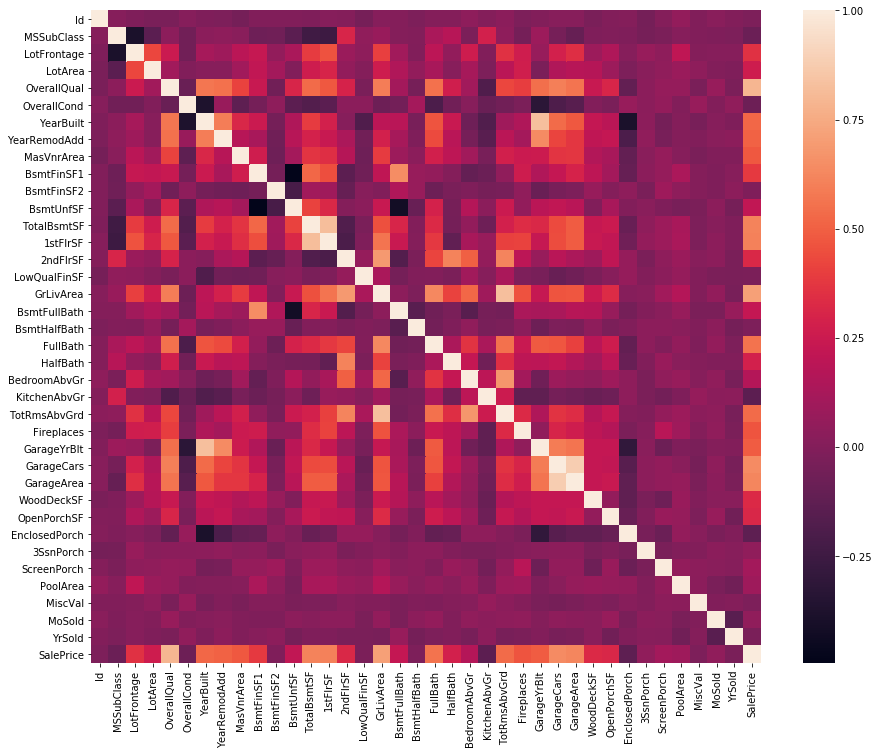

In [60]:
# Let's take a broader view

corrmat = houses_dirty_train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat);

In [79]:
# Now we want to focus in on some of the more important features, but first we need to figure out what they are!
# Let's focus on the sale price and see what is most strongly correlated with it.

print(corrmat['SalePrice'].sort_values())

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

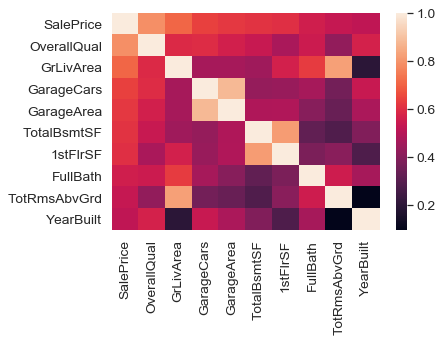

In [76]:
# While some of these correlate with eachother well, note that some are likely to correlate streonly with eachother.
# Thus we can reduce the number of features we'll look at by looking at how each of these are correlated with eachother.

cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(houses_dirty_train[cols].values.T)
hm = sns.heatmap(cm, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

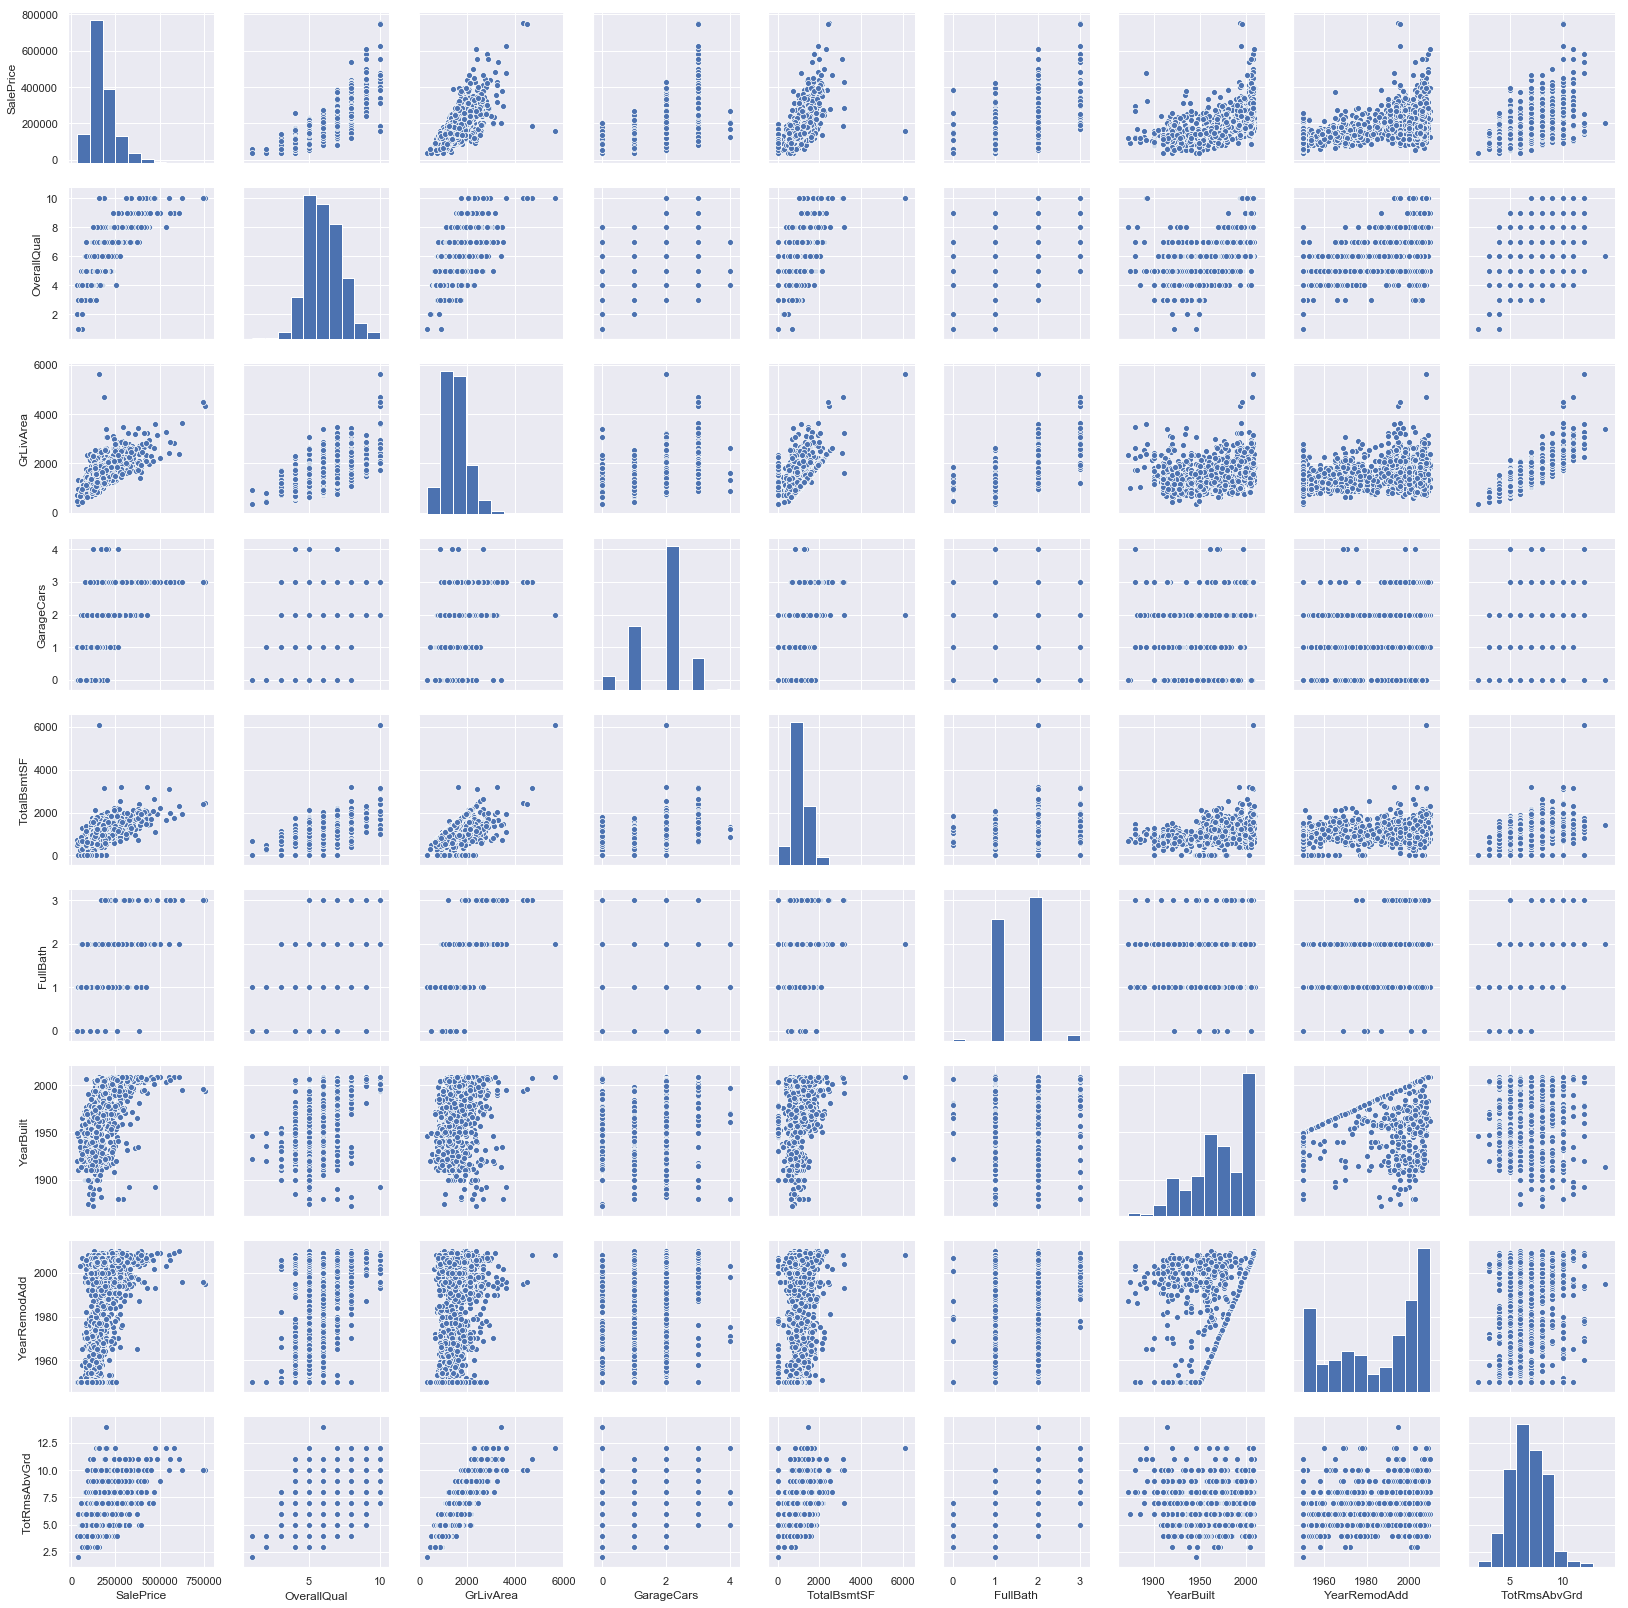

In [78]:
# Looks like GarageArea correlates very strongly with GarageCars and 1stFlrSF correlates strongly with TotalBsmtSF.
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();